In [4]:
# !pip install sympy
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Chapter 2

## Q1

### (a)
From the instantaneous growth rates
$$\frac{dx}{dt}=r_1x\bigg(1-\frac{x}{K_1}\bigg)-\alpha_1xy
\hspace{1cm}\text{and}\hspace{1cm}
\frac{dy}{dt}=r_2y\bigg(1-\frac{y}{K_2}\bigg)-\alpha_2xy$$
we can maxmimize the combined rate
$$z = f(x,y) = \frac{dx}{dt} + \frac{dy}{dt}
= r_1x\bigg(1-\frac{x}{K_1}\bigg)-\alpha_1xy 
+ r_2y\bigg(1-\frac{y}{K_2}\bigg)-\alpha_2xy
$$

In [5]:
x, y, r1, r2, K1, K2, a1, a2, a = sp.symbols('x y r1 r2 k1 k2 a1 a2 a')
dx_dt = 0.05*x*(1-x/150000) - 10**(-8)*x*y
dy_dt = 0.08*y*(1-y/400000) - 10**(-8)*x*y
f = dx_dt + dy_dt
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

sol = sp.solve_poly_system([df_dx, df_dy], x, y)
print(sol[0])
print(f.evalf(subs={x:sol[0][0], y:sol[0][1]}))

(69103.6554832248, 196544.817225839)
9589.38407611417


which yields the solution
$$\frac{\partial z}{\partial x} = \frac{\partial z}{\partial y}= 0
\implies
\begin{cases}
  x=69,104\\
  y=196,545\\
  f(x,y) = 9,589
\end{cases}
$$

Therefore, the population levels of 69,104 blue whales and 196,545 fin whales maximize the number of new whales born each year.

### (b)


In [6]:
#1b 
f1 = r1*x*(1-x/150000) - 10**(-8)*x*y + 0.08*y*(1-y/400000) - 10**(-8)*x*y
df1_dx = sp.diff(f1, x)
df1_dy = sp.diff(f1, y)
# sol = sp.solve_poly_system([df1_dx, df1_dy], x, y)
sol = ((12000000*(250*r1 - 1))/(40000*r1 - 3), (7850000000*r1)/(40000*r1 - 3))
dx_dr1, dy_dr1 = sp.diff(sol[0], r1), sp.diff(sol[1], r1) 
s_x_r1 = (3000000000/(40000*0.05 - 3) - 40000*(3000000000*0.05 - 12000000)/(40000*0.05 - 3)**2) * (0.05 / 69103.6554832248)
s_y_r1 = (-314000000000000*0.05/(40000*0.05 - 3)**2 + 7850000000/(40000*0.05 - 3)) * (0.05 / 196544.817225839)


f2 = 0.05*x*(1-x/150000) - 10**(-8)*x*y + r2*y*(1-y/400000) - 10**(-8)*x*y
df2_dx = sp.diff(f2, x)
df2_dy = sp.diff(f2, y)
# sol = sp.solve_poly_system([df2_dx, df2_dy], x,y)
sol = (1725000000*r2)/(25000*r2 - 3), (2500000*(2000*r2 - 3))/(25000*r2 - 3)
dx_dr2, dy_dr2 = sp.diff(sol[0], r2), sp.diff(sol[1], r2)
s_x_r2 = (-43125000000000*0.08/(25000*0.08 - 3)**2 + 1725000000/(25000*0.08 - 3)) * (0.08 / 69103.6554832248)
s_y_r2 = (5000000000/(25000*0.08 - 3) - 25000*(5000000000*0.08 - 7500000)/(25000*0.08 - 3)**2) * (0.08 / 196544.817225839)


print('S(x, r1) = '+str(round(s_x_r1, 3)))
print('S(y, r1) = '+str(round(s_y_r1, 3)))
print('S(x, r2) = '+str(round(s_x_r2, 3)))
print('S(y, r2) = '+str(round(s_y_r2, 3)))

S(x, r1) = 0.085
S(y, r1) = -0.002
S(x, r2) = -0.002
S(y, r2) = 0.018


Allowing the intrinsic growth rate parameters $r_i$ to vary yields the sensitivity values (evaluated at the maximization point from (a))
$$S(x, r_1) = \frac{dx}{dr_1}\frac{r_1}{x} = 0.085 = \frac{8.5}{100}$$
$$S(y, r_1) = \frac{dy}{dr_1}\frac{r_1}{y} = -0.002 = -\frac{2}{1000}$$
$$S(x, r_2) = \frac{dx}{dr_2}\frac{r_2}{x} = -0.002 = -\frac{2}{1000}$$
$$S(y, r_2) = \frac{dy}{dr_2}\frac{r_2}{y} = 0.018 = -\frac{1.8}{100}$$

which are relatively minimal.

### (c)

In [7]:
f1 = 0.05*x*(1-x/K1) - 10**(-8)*x*y + 0.08*y*(1-y/400000) - 10**(-8)*x*y
df1_dx = sp.diff(f1, x)
df1_dy = sp.diff(f1, y)
# sol = sp.solve_poly_system([df1_dx, df1_dy], x, y)
sol = -(46000000*K1)/(K1 - 100000000), (2500000*(K1 - 8000000))/(K1 - 100000000)
dx_dK1, dy_dK1 = sp.diff(sol[0], K1), sp.diff(sol[1], K1)
s_x_K1 = dx_dK1.evalf(subs={K1:150000}) * (150000/69103.6554832248)
s_y_K1 = dy_dK1.evalf(subs={K1:150000}) * (150000/196544.817225839)


f2 = 0.05*x*(1-x/150000) - 10**(-8)*x*y + 0.08*y*(1-y/K2) - 10**(-8)*x*y
df2_dx, df2_dy = sp.diff(f2, x), sp.diff(f2, y)
# sol = sp.solve_poly_system([df2_dx, df2_dy], x, y)
sol = (12000000*(K2 - 5000000))/(3*K2 - 800000000), -(392500000*K2)/(3*K2 - 800000000)
dx_dK2, dy_dK2 = sp.diff(sol[0], K2), sp.diff(sol[1], K2)
s_x_K2 = dx_dK2.evalf(subs={K2:400000}) * (400000/69103.6554832248)
s_y_K2 = dy_dK2.evalf(subs={K2:400000}) * (400000/196544.817225839)

print('S(x, K1) = '+str(round(s_x_K1, 3)))
print('S(y, K1) = '+str(round(s_y_K1, 3)))
print('S(x, K2) = '+str(round(s_x_K2, 3)))
print('S(y, K2) = '+str(round(s_y_K2, 3)))

S(x, K1) = 1.002
S(y, K1) = -0.018
S(x, K2) = -0.085
S(y, K2) = 1.002


Allowing the carrying capacity parameters $K_i$ to vary yields the sensitivity values (evaluated at the maximization point from (a))
$$S(x, K_1) = \frac{dx}{dK_1}\frac{K_1}{x} = 1.002 = \frac{1.002}{1}$$
$$S(y, K_1) = \frac{dy}{dK_1}\frac{K_1}{y} = -0.018 = -\frac{-1.8}{100}$$
$$S(x, K_2) = \frac{dx}{dK_2}\frac{K_2}{x} = -0.085 = -\frac{8.5}{100}$$
$$S(y, K_2) = \frac{dy}{dK_2}\frac{K_2}{y} = 1.002 = -\frac{1.002}{1}$$

so that a 1% increase in a species' carrying capacity increasing that species' optimal population by 1%, but has a minimal effect on the competitive species.

### (d)
We consider
$$z=f(x,y)
=r_1x\bigg(1-\frac{x}{K_1}\bigg)
+r_2y\bigg(1-\frac{y}{K_2}\bigg)
-2\alpha xy
$$

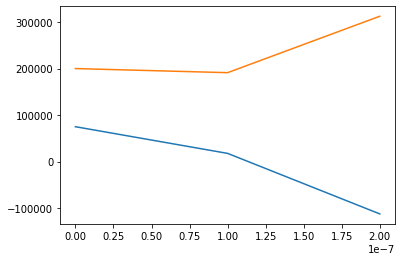

In [8]:
dx_dt = 0.05*x*(1-x/150000) - a*x*y
dy_dt = 0.08*y*(1-y/400000) - a*x*y
f = dx_dt + dy_dt

df_dx, df_dy = sp.diff(f, x), sp.diff(f, y)

sol = (75000*(8000000*a - 1))/(15000000000000*a**2 - 1), (200000*(1875000*a - 1))/(15000000000000*a**2 - 1)

ival = np.arange(0, 3*10**(-7), 0.0000001)
xval = []
yval = []
for i in ival:
  xval.append(sol[0].evalf(subs={a:i}))
  yval.append(sol[1].evalf(subs={a:i}))

plt.plot(ival, xval)
plt.plot(ival, yval)

In [9]:
float(sp.solve(sol[0], a)[0])

1.25e-07

Therefore, if $\alpha >= 1\times 10^{-7}$, it is optimal for blue whales to become extinct.